# Machine Learning

1. Supervised Learning
    1. Regression (predict value)
    1. Classification (predict label)
1. Unsupervised Learning
    1. Clustering 
    1. **Dimensionality reduction**

---

## Dimensionality reduction
* Transform data input to a lower dimensional space, at preserve as much infomation as possible at the same time
    * Reduce the number of columns of data input
* Reasons
    1. Preprocessing step, so that ML task work faster & consume less memory later
    1. Visualization is easier for lower dimensions
* **Principle Component Analysis (PCA)** - one of the most famous dimensionality reduction algorithm
    * unsupervised - fit(data), no labels
    * Keep the main components, preserve as mush variance as possible
    * linear transformation (for non-linear dimensionality reduction use KernelPCA)

<img src='pca.png' width='600'>
    


In [2]:
from sklearn.datasets import load_digits
digits = load_digits() # load digits dataset (bundled with sklearn for learning / testing purpose)

# digits.feature_names # 8x8 pixels
# len(digits.feature_names)
# digits.data.shape

(1797, 64)

Text(0, 0.5, 'Cumulative explained variance')

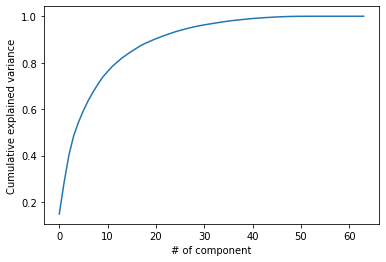

In [6]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA() # keep all components, so that we can plot the graph later
pca.fit(digits.data)

# diagram 1
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('# of component')
# plt.ylabel('Explained variance ratio');

# diagram 2
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of component')
plt.ylabel('Cumulative explained variance')

### Preprocessing using PCA

In [11]:
%%time

# originally there are 8x8 features

# method 1 (set number of components to keep)
pca1 = PCA(n_components=30) # number of components to keep (the most important one)
data_transformed = pca1.fit_transform(digits.data) # unsupervised learning

# print(f'# of column (original): {digits.data.shape}') # originally we have 64 column
# print(f'# of column (after pca1): {data_transformed.shape}') # originally we have 64 column

# pca1.explained_variance_ # variances for each components retained
# pca1.explained_variance_ratio_ # components' variance ratio (no drop)
ev_sum = sum(pca1.explained_variance_ratio_) # the total % of variances preserved
ev_sum # 0.959

Wall time: 19 ms


0.9590819807869222

In [12]:
%%time

# method 2 (set the variance ratio that we want to preserve)
pca2 = PCA(n_components=0.959)
data_transformed = pca2.fit_transform(digits.data)

print(f'# of column (original): {digits.data.shape}') # originally we have 64 column
print(f'# of column (after pca2): {data_transformed.shape}') # originally we have 64 column
ev_sum = sum(pca2.explained_variance_ratio_) # the total % of variances preserved
ev_sum # 0.959

# of column (original): (1797, 64)
# of column (after pca2): (1797, 30)
Wall time: 18 ms


0.9590854042457172

### Classification on low dimensional data

In [13]:
from sklearn.model_selection import train_test_split
X_pca, y = data_transformed, digits.target # replace original data by data_pca1
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      0.98      0.98        42
           2       0.98      0.98      0.98        41
           3       0.98      0.96      0.97        52
           4       0.98      1.00      0.99        47
           5       0.95      0.97      0.96        39
           6       1.00      1.00      1.00        43
           7       0.98      1.00      0.99        48
           8       0.92      0.92      0.92        37
           9       1.00      0.98      0.99        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<AxesSubplot:>

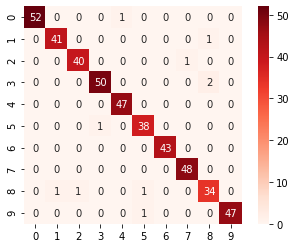

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() 
model.fit(X_train_pca, y_train_pca) # training - fit()
pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, pred)  # TEST SET accuracy of this model
clf_report = classification_report(y_test_pca, pred)
conf_mat = confusion_matrix(y_test_pca, pred)

print(clf_report)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d',cmap='Reds')

# accuracy may OR may NOT increase!!! (There are some loss)
# but training speed is much faster (64 =>30 col)

---

### Visualization
* Using PCA and other dimensionality reduction algorithms

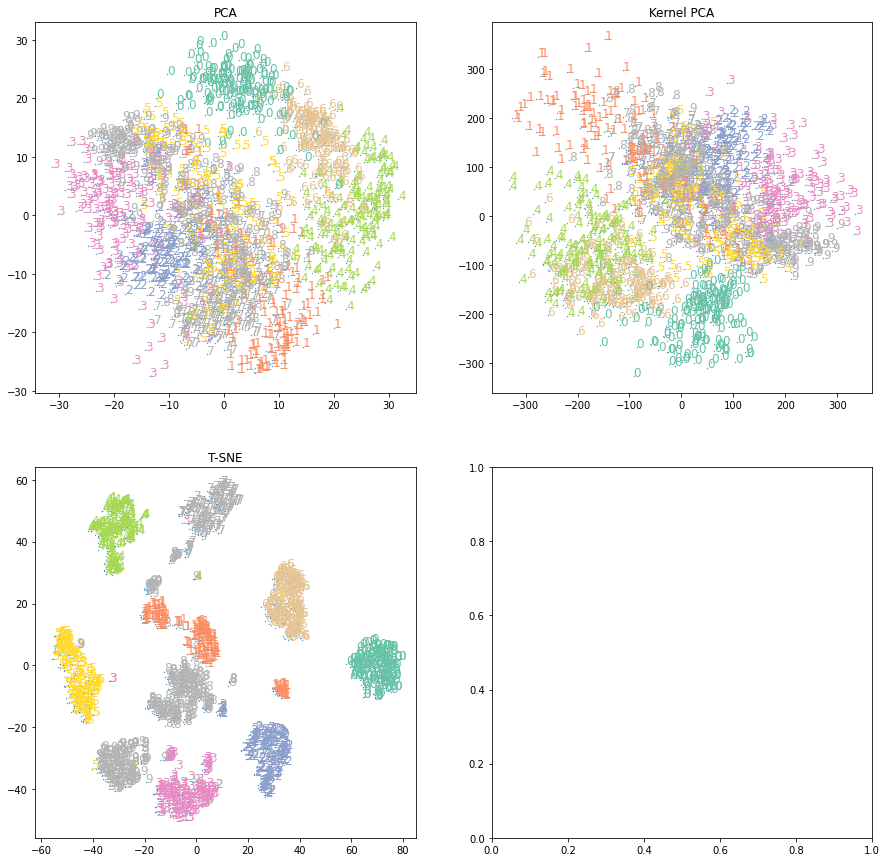

In [15]:
from sklearn.datasets import load_digits
 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

def visualizeData(ax, digits, data_reduced, title):
    X = data_reduced
    y = digits.target
    ax.scatter(X[:,0], X[:,1], marker='.', s=0.5)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set2(y[i]), fontdict={'size': 12})
    ax.set_title(title)

digits = load_digits()

fig, axes = plt.subplots(2,2, figsize=(15, 15))

# PCA (linear)
pca = PCA(n_components=2) # number of components to keep (the most important one)
data_reduced = pca.fit_transform(digits.data) # unsupervised learning
visualizeData(axes[0][0], digits, data_reduced, 'PCA')

# Kernel PCA (non-linear)
kpca = KernelPCA(n_components=2, kernel='poly', degree=3) # default kernel is linear
data_reduced = kpca.fit_transform(digits.data) # unsupervised learning
visualizeData(axes[0][1], digits, data_reduced, 'Kernel PCA')

# T-SNE (non-linear)
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(digits.data) # unsupervised learning
visualizeData(axes[1][0], digits, data_reduced, 'T-SNE')